# Sea Creatures Classification

Dataset:
https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste

## TensorFlow and Keras

In [61]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
import tensorflow as tf
from tensorflow import keras

In [63]:
from tensorflow.keras.preprocessing.image import load_img

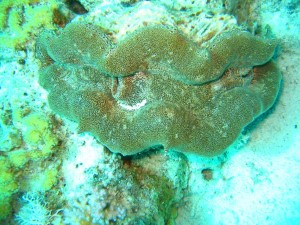

In [64]:
path = './data/Clams'
name = '10711395_a16c4c2901_o.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [65]:
img = load_img(fullname, target_size=(299, 299))

In [66]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks

In [67]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [68]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [69]:
X = np.array([x])

In [70]:
X.shape

(1, 299, 299, 3)

In [71]:
X = preprocess_input(X)

In [72]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


In [73]:
decode_predictions(pred)

[[('n01496331', 'electric_ray', np.float32(0.16202292)),
  ('n01924916', 'flatworm', np.float32(0.09323184)),
  ('n09256479', 'coral_reef', np.float32(0.07795426)),
  ('n01917289', 'brain_coral', np.float32(0.0732718)),
  ('n01950731', 'sea_slug', np.float32(0.03713645))]]

## Training the model

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2,)

In [76]:
train_ds = data_generator.flow_from_directory(
  './data',
  target_size=(150,150),
  batch_size=32,
  subset="training"
)


Found 10979 images belonging to 23 classes.


In [77]:
val_ds = data_generator.flow_from_directory(
  './data',
  target_size=(150,150),
  batch_size=32,
  subset="validation"
)

Found 2732 images belonging to 23 classes.


In [78]:
train_ds.class_indices

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Turtle_Tortoise': 21,
 'Whale': 22}

In [79]:
x, y = next(train_ds)

In [80]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [86]:
base_model = Xception(
  weights='imagenet',
  include_top=False,
  input_shape=(150,150,3)
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(23)(vectors)

model = keras.Model(inputs, outputs)

In [87]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer, loss=loss, metrics=['accuracy'])

In [88]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 138s 397ms/step - accuracy: 0.5857 - loss: 2.2242 - val_accuracy: 0.6848 - val_loss: 1.8755
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 135s 393ms/step - accuracy: 0.7394 - loss: 1.2915 - val_accuracy: 0.6724 - val_loss: 2.2085
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 135s 393ms/step - accuracy: 0.7668 - loss: 1.1197 - val_accuracy: 0.6654 - val_loss: 2.3967
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 135s 392ms/step - accuracy: 0.8156 - loss: 0.8227 - val_accuracy: 0.6775 - val_loss: 2.2859
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 136s 395ms/step - accuracy: 0.8375 - loss: 0.6940 - val_accuracy: 0.6885 - val_loss: 2.3719
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 135s 393ms/step - accuracy: 0.8539 - loss: 0.6192 - val_accuracy: 0.6827 - val_loss: 2.4945
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 136s 394ms/step - accuracy: 0.8575 - loss: 0.5947 - val_accuracy: 0.6695 - val_loss: 3.0015
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 138s 401ms/step - accuracy: 0.8737 -

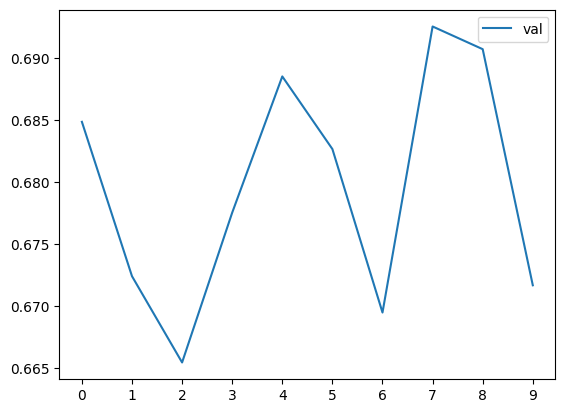

In [91]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate